In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import scipy.stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.diagnostic as smd
import pickle
import seaborn as sns

In [2]:
years = list(range(2001, 2024))
years_contracts = list(range(1996, 2024))

In [3]:
with open('./data/final_stats.pickle', 'rb') as statistics:
    final_stats = pickle.load(statistics)

In [4]:
with open('./data/cleaned_data/players_contracts.pickle', 'rb') as play_contracts:
    players_contracts = pickle.load(play_contracts)

In [5]:
stats_columns = ["ID", "salary_perc", "last_year_of_contract", "age", "games_played_perc", "games_started_perc", "avg_minutes_played", "WS48", "team_successes",
              "defensive", "most_improved", "most_valuable", "most_valuable_finals", "sixth_man", "all_league", "all_def", "season"]
last_year_of_contracts = pd.DataFrame(columns=stats_columns)

In [6]:
for year in years[:-1]:
    contracts = pd.DataFrame()
    contracts = final_stats[year].query("last_year_of_contract == True").copy()
    contracts["season"] = year
    contracts = contracts.reset_index()
    last_year_of_contracts = pd.concat([last_year_of_contracts, contracts]).reset_index(drop=True)

In [7]:
model_columns = ["salary_perc", "age", "games_played_perc", "games_started_perc", "avg_minutes_played", "WS48", "team_successes",
              "defensive", "most_improved", "most_valuable", "most_valuable_finals", "sixth_man", "all_league", "all_def"]
model_data = pd.DataFrame(columns = model_columns)

In [8]:
for index, row in last_year_of_contracts.iterrows():
    row_id = row['ID']
    season = row["season"]
    try:
        salary_perc = final_stats[season+1].query(f'ID == "{row_id}"')["salary_perc"].iloc[0]
        age = row["age"]
        games_played_perc = row["games_played_perc"]
        games_started_perc = row["games_started_perc"]
        avg_minutes_played = row["avg_minutes_played"]
        win_shares_per = row["WS48"]
        team_successes = row["team_successes"]
        defensive = row["defensive"]
        most_improved = row["most_improved"]
        most_valuable = row["most_valuable"]
        most_valuable_finals = row["most_valuable_finals"]
        sixth_man = row["sixth_man"]
        all_league = row["all_league"]
        all_def = row["all_def"]

        new_df_row = [salary_perc, age, games_played_perc, games_started_perc, avg_minutes_played, win_shares_per, team_successes, defensive, most_improved, most_valuable, most_valuable_finals, sixth_man, all_league, all_def]
        model_data.loc[len(model_data)] = new_df_row
    except:
        pass

In [9]:
for index, row in model_data.iterrows():
    success_points = row['defensive'] * 2 + row['most_improved'] * 1 + row['most_valuable'] * 5 + row['most_valuable_finals'] * 4 + row['sixth_man'] * 2 + row['all_league'] * 2 + row['all_def'] * 1
    model_data.loc[index, 'player_successes'] = success_points

In [10]:
model_data

,salary_perc,age,games_played_perc,games_started_perc,avg_minutes_played,WS48,team_successes,defensive,most_improved,most_valuable,most_valuable_finals,sixth_man,all_league,all_def,player_successes
0,0.34,34.0,0.933333,0.933333,36.42,11.27,3.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0
1,0.01,23.0,0.182927,0.000000,8.40,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.11,25.0,0.841463,0.719512,28.10,7.52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.01,24.0,0.420000,0.020000,7.06,1.85,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.05,38.0,0.963415,0.963415,26.70,3.60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2064,0.05,25.0,0.883721,0.569767,25.14,9.37,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2065,0.12,29.0,0.909091,0.909091,30.22,11.56,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2066,0.07,32.0,0.810000,0.150000,14.86,10.57,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2067,0.02,27.0,0.477273,0.045455,10.82,2.87,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
model_data.query("salary_perc >= 0.3")

,salary_perc,age,games_played_perc,games_started_perc,avg_minutes_played,WS48,team_successes,defensive,most_improved,most_valuable,most_valuable_finals,sixth_man,all_league,all_def,player_successes
0,0.34,34.0,0.933333,0.933333,36.42,11.27,3.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0
6,0.30,29.0,0.954023,0.954023,36.67,9.84,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.30,27.0,0.866667,0.866667,40.81,13.04,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
34,0.56,30.0,0.840426,0.829787,38.15,16.76,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0
43,0.30,29.0,0.980392,0.980392,38.44,14.50,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003,0.30,22.0,0.800000,0.800000,35.66,10.31,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
2023,0.39,33.0,0.826923,0.788462,34.55,11.13,5.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,6.0
2025,0.30,23.0,0.931034,0.931034,35.04,13.75,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
2028,0.30,26.0,0.816092,0.816092,34.90,8.02,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
reg = smf.ols(formula='np.log(salary_perc) ~ age + games_played_perc + games_started_perc + avg_minutes_played + WS48 + team_successes + player_successes', data=model_data)
results = reg.fit()
print(f'results.summary(): \n{results.summary()}\n')

results.summary(): 
                                       OLS Regression Results                                      
Dep. Variable:     np.log(salary_perc).to_numpy()[:, None]   R-squared:                       0.623
Model:                                                 OLS   Adj. R-squared:                  0.622
Method:                                      Least Squares   F-statistic:                     486.6
Date:                                     Sun, 13 Aug 2023   Prob (F-statistic):               0.00
Time:                                             01:16:58   Log-Likelihood:                -1953.0
No. Observations:                                     2069   AIC:                             3922.
Df Residuals:                                         2061   BIC:                             3967.
Df Model:                                                7                                         
Covariance Type:                                 nonrobust                      

In [24]:
y_hat = results.fittedvalues

[]

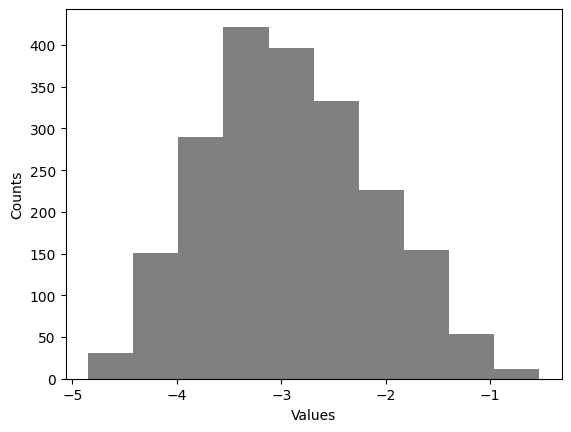

In [25]:
# subfigure a (histogram with counts):
plt.hist(y_hat, color='grey')
plt.ylabel('Counts')
plt.xlabel('Values')
plt.plot()


In [26]:
# test reset
reset_test = smd.linear_reset(res=results, power=2, test_type = "fitted")

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

In [20]:
x = np.random.randn(100)
y = np.random.randn(100)

regression = sm.OLS(y, x)
outcome = regression.fit()
print(outcome)

smd.linear_reset(outcome, power = 2, test_type = "fitted")

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=0.5453832377398826, p-value=0.46021026093786066, df_denom=1>